In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning

In [8]:
movies=pd.read_csv('dataset.csv')

In [9]:
movies.head(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
5,667257,Impossible Things,"Family,Drama",es,"Matilde is a woman who, after the death of her...",14.358,2021-06-17,8.6,255
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093
7,730154,Your Eyes Tell,"Romance,Drama",ja,"A tragic accident lead to Kaori's blindness, b...",51.345,2020-10-23,8.5,339
8,372754,Dou kyu sei – Classmates,"Romance,Animation",ja,"Rihito Sajo, an honor student with a perfect s...",14.285,2016-02-20,8.5,239
9,372058,Your Name.,"Romance,Animation,Drama",ja,High schoolers Mitsuha and Taki are complete s...,158.270,2016-08-26,8.5,8895


In [10]:
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [12]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

## Feature Selection 

In [13]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [14]:
movies=movies[['id', 'title', 'overview', 'genre']]

In [15]:
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [16]:
movies['tags'] = movies['overview']+movies['genre']

In [17]:
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [18]:
new_data  = movies.drop(columns=['overview', 'genre'])

In [19]:
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer(max_features=10000, stop_words='english')

In [22]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [23]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [24]:
vector.shape

(10000, 10000)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
similarity=cosine_similarity(vector)

In [27]:
similarity

array([[1.        , 0.05634362, 0.12888482, ..., 0.07559289, 0.11065667,
        0.06388766],
       [0.05634362, 1.        , 0.07624929, ..., 0.        , 0.03636965,
        0.        ],
       [0.12888482, 0.07624929, 1.        , ..., 0.02273314, 0.06655583,
        0.08645856],
       ...,
       [0.07559289, 0.        , 0.02273314, ..., 1.        , 0.03253   ,
        0.02817181],
       [0.11065667, 0.03636965, 0.06655583, ..., 0.03253   , 1.        ,
        0.0412393 ],
       [0.06388766, 0.        , 0.08645856, ..., 0.02817181, 0.0412393 ,
        1.        ]])

In [28]:
new_data[new_data['title']=="The Godfather"].index[0]

2

In [29]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [30]:
def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [31]:
recommand("Dilwale Dulhania Le Jayenge")

Dilwale Dulhania Le Jayenge
A Passage to India
The Manual of Love
The Cameraman
The Graduate


In [32]:
import pickle

In [33]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [34]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [35]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


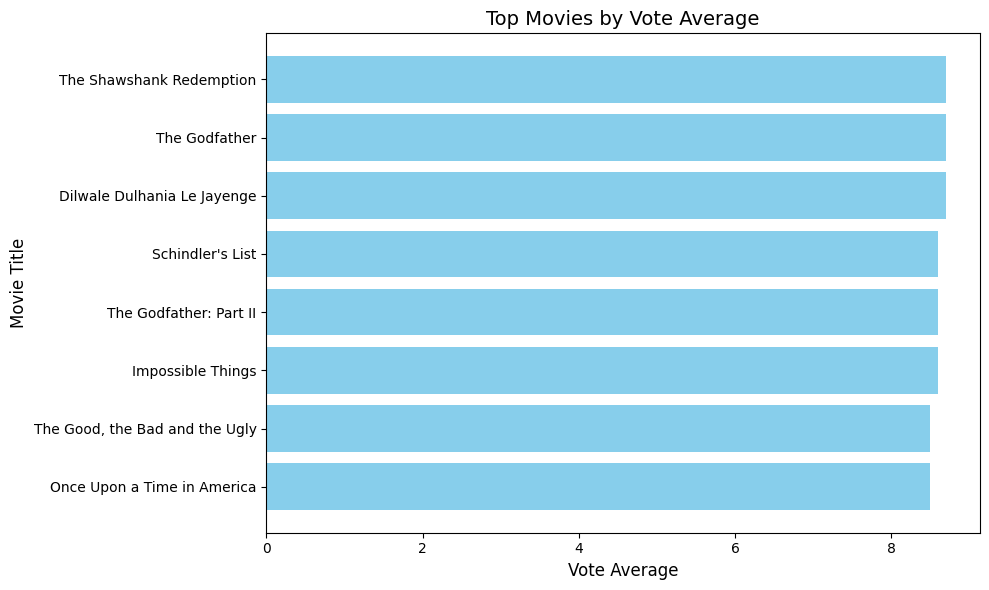

In [36]:
# Visualization: Top movies by vote average
plt.figure(figsize=(10, 6))
top_movies = df.sort_values(by='vote_average', ascending=False).head(8)

plt.barh(top_movies['title'], top_movies['vote_average'], color='skyblue')
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top Movies by Vote Average', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()